In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from corner import corner
from matplotlib import pyplot as plt
from stellr import Optimizer
from scipy.stats import norm

In [162]:
path = 'population+sun_results/max_pool/DR14_ASPC/'

opt = Optimizer()
opt.load_trace(os.path.join(path, 'trace'))

In [163]:
posterior = opt.trace.posterior
posterior

<xarray.Dataset>
Dimensions:                                         (chain: 10, draw: 2000, population/stars/age_dim_0: 66, population/stars/dnu_dim_0: 66, population/stars/f_evol/__sigmoid_offset_dim_0: 66, population/stars/f_evol/offset_dim_0: 66, population/stars/f_evol_dim_0: 66, population/stars/log_age_dim_0: 66, population/stars/lum_dim_0: 66, population/stars/mass/__sigmoid_offset_dim_0: 66, population/stars/mass/offset_dim_0: 66, population/stars/mass_dim_0: 66, population/stars/mhi_dim_0: 66, population/stars/mhs_dim_0: 66, population/stars/rad_dim_0: 66, population/stars/teff_dim_0: 66, population/stars/yi/offset_dim_0: 66, population/stars/yi_dim_0: 66, population/stars/zi/__sigmoid_offset_dim_0: 66, population/stars/zi/offset_dim_0: 66, population/stars/zi_dim_0: 66)
Coordinates:
  * draw                                            (draw) int32 0 1 ... 1999
  * population/stars/yi/offset_dim_0                (population/stars/yi/offset_dim_0) int32 0 ... 65
  * population/stars/f_evol/__sigmoid_offset_dim_0  (population/stars/f_evol/__sigmoid_offset_dim_0) int32 0 ... 65
  * population/stars/mass/__sigmoid_offset_dim_0    (population/stars/mass/__sigmoid_offset_dim_0) int32 0 ... 65
  * population/stars/zi/__sigmoid_offset_dim_0      (population/stars/zi/__sigmoid_offset_dim_0) int32 0 ... 65
  * population/stars/f_evol_dim_0                   (population/stars/f_evol_dim_0) int32 0 ... 65
  * population/stars/mass_dim_0                     (population/stars/mass_dim_0) int32 0 ... 65
  * population/stars/zi_dim_0                       (population/stars/zi_dim_0) int32 0 ... 65
  * population/stars/yi_dim_0                       (population/stars/yi_dim_0) int32 0 ... 65
  * population/stars/log_age_dim_0                  (population/stars/log_age_dim_0) int32 0 ... 65
  * population/stars/teff_dim_0                     (population/stars/teff_dim_0) int32 0 ... 65
  * population/stars/rad_dim_0                      (population/stars/rad_dim_0) int32 0 ... 65
  * population/stars/dnu_dim_0                      (population/stars/dnu_dim_0) int32 0 ... 65
  * population/stars/mhs_dim_0                      (population/stars/mhs_dim_0) int32 0 ... 65
  * population/stars/mhi_dim_0                      (population/stars/mhi_dim_0) int32 0 ... 65
  * population/stars/age_dim_0                      (population/stars/age_dim_0) int32 0 ... 65
  * population/stars/lum_dim_0                      (population/stars/lum_dim_0) int32 0 ... 65
  * population/stars/f_evol/offset_dim_0            (population/stars/f_evol/offset_dim_0) int32 0 ... 65
  * population/stars/mass/offset_dim_0              (population/stars/mass/offset_dim_0) int32 0 ... 65
  * population/stars/zi/offset_dim_0                (population/stars/zi/offset_dim_0) int32 0 ... 65
  * chain                                           (chain) int32 0 1 2 ... 8 9
Data variables:
    population/stars/yi/offset                      (chain, draw, population/stars/yi/offset_dim_0) float32 ...
    population/stars/f_evol/__sigmoid_offset        (chain, draw, population/stars/f_evol/__sigmoid_offset_dim_0) float32 ...
    population/stars/mass/__sigmoid_offset          (chain, draw, population/stars/mass/__sigmoid_offset_dim_0) float32 ...
    population/stars/zi/__sigmoid_offset            (chain, draw, population/stars/zi/__sigmoid_offset_dim_0) float32 ...
    population/stars/f_evol                         (chain, draw, population/stars/f_evol_dim_0) float32 ...
    population/stars/mass                           (chain, draw, population/stars/mass_dim_0) float32 ...
    population/stars/zi                             (chain, draw, population/stars/zi_dim_0) float32 ...
    population/stars/yi                             (chain, draw, population/stars/yi_dim_0) float32 ...
    population/stars/log_age                        (chain, draw, population/stars/log_age_dim_0) float32 ...
    population/stars/teff                           (chain, draw, population/stars/tef

In [164]:
stars = pd.read_csv(os.path.join(path, 'population/stars/results.csv'))
stars.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.906600,0.933565,0.958570,14814.078509,14457.590358,14457.590358,12525.326457,0.882466,0.980805,...,16346.968789,16346.968789,14059.722905,-0.290421,-0.017689,0.000565,0.000400,-0.154340,1.000164,0.072268
1,KIC3942719,1.834211,1.857003,1.874003,7692.988729,6610.370178,6610.370178,7838.298468,1.811250,1.891878,...,3926.564082,3926.564082,5428.190654,-0.402333,-0.185405,0.000932,0.000659,-0.293650,1.002463,0.058408
2,KIC4457351,1.800964,1.827026,1.849178,25656.192735,24440.010521,24440.010521,13743.689247,1.775748,1.867239,...,18829.260333,17676.494127,14055.527608,-0.345795,-0.170909,0.000344,0.000251,-0.256936,1.000167,0.047164
3,KIC3223000,0.361550,0.461588,0.564776,5179.851181,5138.879217,5138.879217,7768.045064,0.292485,0.647554,...,8543.069745,8543.069745,10476.345520,-0.260611,-0.000278,0.000765,0.000541,-0.130906,1.001091,0.070712
4,KIC7429287,1.538701,1.579853,1.618889,26815.711877,26219.213547,26219.213547,14806.567632,1.505526,1.656075,...,11388.367440,10311.988248,10317.704128,-0.414990,-0.150444,0.000663,0.000492,-0.286388,1.000026,0.070719


In [165]:
pop = pd.read_csv(os.path.join(path, 'population/results.csv'))
pop

,dydz_16th,dydz_50th,dydz_84th,dydz_ess_bulk,dydz_ess_mean,dydz_ess_sd,dydz_ess_tail,dydz_hpd_3%,dydz_hpd_97%,dydz_mcse_mean,...,mlt_ess_mean,mlt_ess_sd,mlt_ess_tail,mlt_hpd_3%,mlt_hpd_97%,mlt_mcse_mean,mlt_mcse_sd,mlt_mean,mlt_r_hat,mlt_sd
0,0.491511,0.763454,0.99981,1115.487716,1121.166575,1121.166575,1907.567667,0.238563,1.216511,0.007738,...,9352.324472,9352.324472,14086.482606,2.0314,2.144985,0.000309,0.000218,2.089183,1.000708,0.029869


In [166]:
# var_names = ['/'.join(['population', name]) for name in ['dydz', 'yp', 'sigma_yi', 'mu_mlt', 'sigma_mlt']]
var_names = ['/'.join(['population', name]) for name in ['dydz', 'yp', 'sigma_yi', 'mlt']]

In [167]:
samples = posterior[var_names].to_dataframe()

In [168]:
n = 100

subsamples = samples.sample(n)

z = np.array([[0.], [0.05]]) * np.ones((2, n))
y = z * subsamples['population/dydz'].to_numpy()[np.newaxis, :] + \
    subsamples['population/yp'].to_numpy()[np.newaxis, :]

In [169]:
y_upper = y + subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]
y_lower = y - subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]

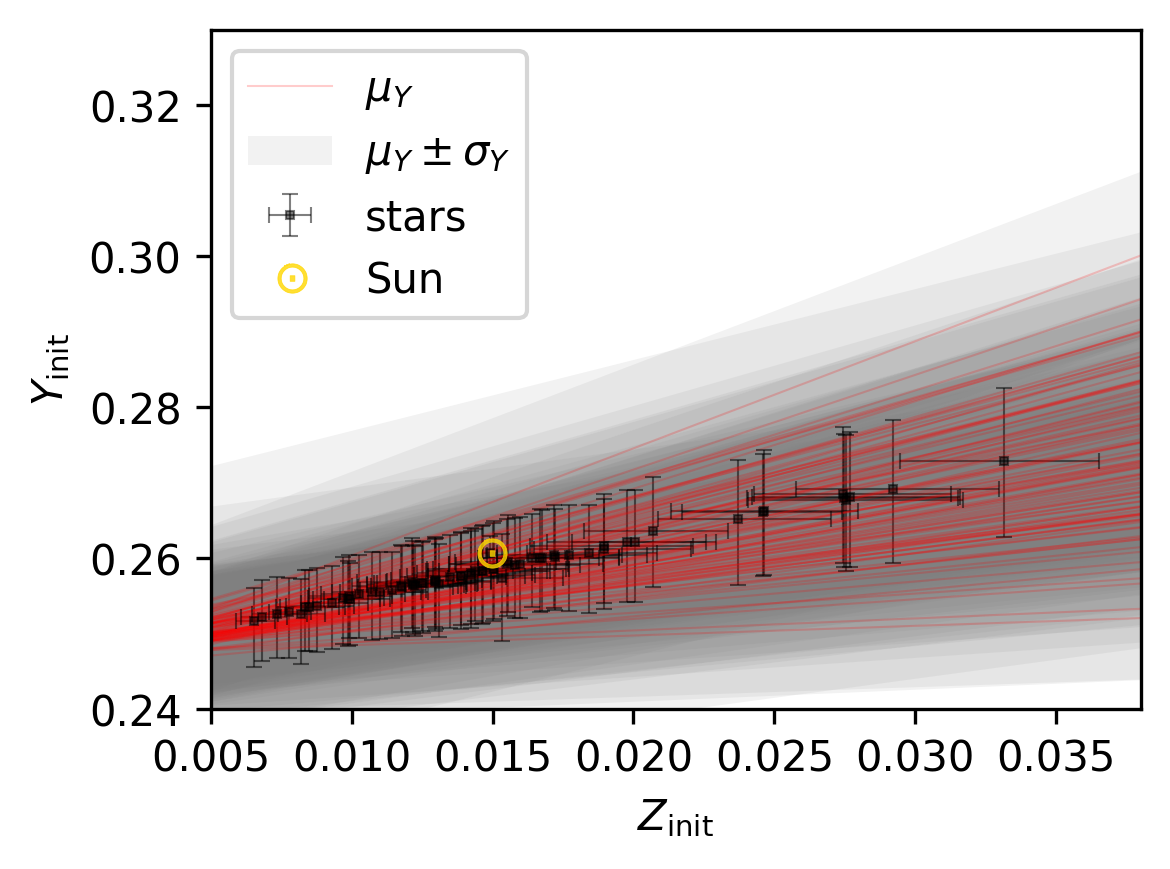

In [170]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.fill_between(z[:, i], y_upper[:, i], y_lower[:, i], facecolor='grey', edgecolor='none', alpha=0.1)

l_mod = plt.plot(z, y, 'r', alpha=0.2, linewidth=0.5)

l_data = plt.errorbar(x=stars['zi_50th'], y=stars['yi_50th'],
             xerr=[stars['zi_50th']-stars['zi_16th'], stars['zi_84th']-stars['zi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
#              zorder=1
             )

handles = [l_mod[0], l_sig, l_data]
labels=[r'$\mu_Y$', r'$\mu_Y \pm \sigma_Y$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s['zi_50th'], s['yi_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']

plt.xlabel(r'$Z_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(0.005, 0.038)
plt.ylim(0.24, 0.33)

# plt.legend();

plt.legend(handles=handles, labels=labels);

plt.savefig(os.path.join(path, 'zi_yi_results_plot.png'), bbox_inches='tight')

In [171]:
n_points = 100
z = np.linspace(0.005, 0.04, n_points)[:, np.newaxis] * np.ones((n_points, n))
y = z * subsamples['population/dydz'].to_numpy()[np.newaxis, :] + \
    subsamples['population/yp'].to_numpy()[np.newaxis, :]
zx = z / (1 - y - z)
zx_sun = 0.0181
mhi = np.log10(zx) - np.log10(zx_sun)

In [172]:
y_upper = y + subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]
y_lower = y - subsamples['population/sigma_yi'].to_numpy()[np.newaxis, :]

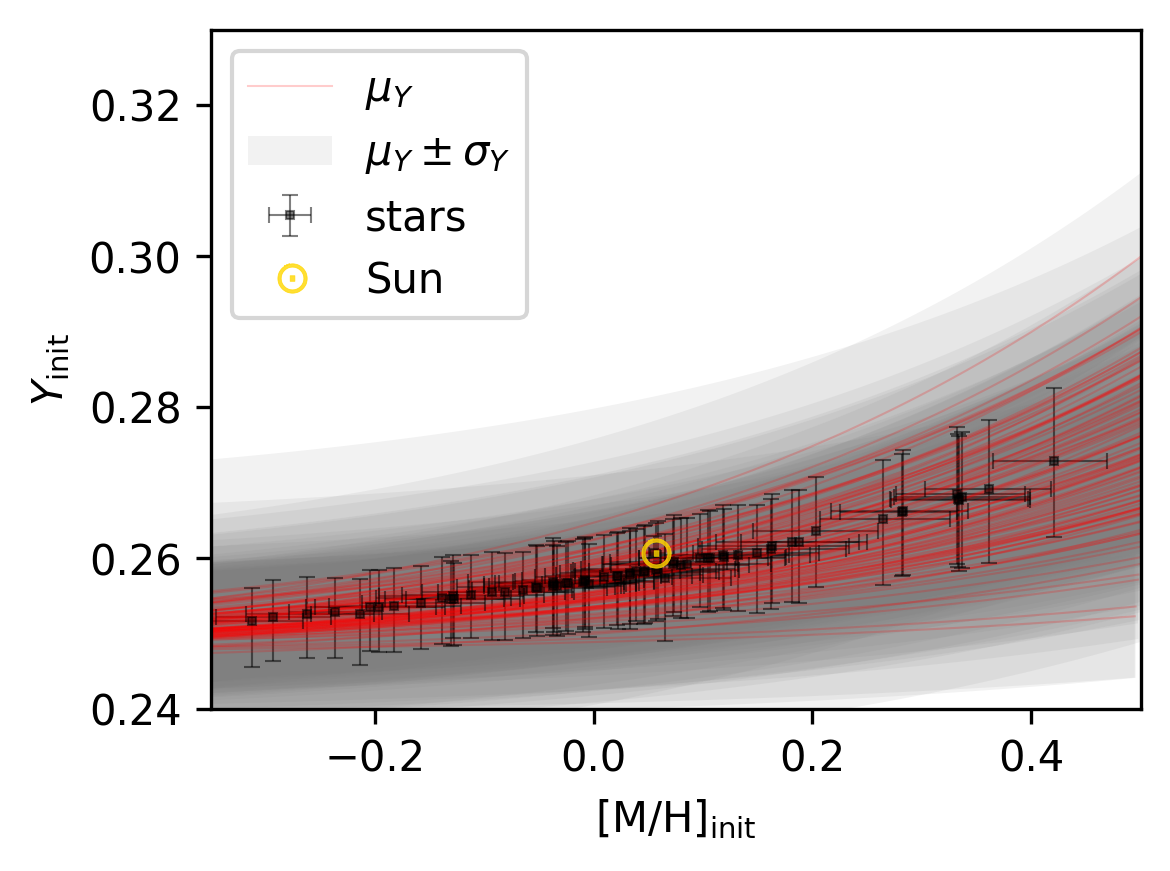

In [173]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.fill_between(mhi[:, i], y_upper[:, i], y_lower[:, i], facecolor='grey', edgecolor='none', alpha=0.1)

l_mod = plt.plot(mhi, y, 'r', alpha=0.2, linewidth=0.5)

l_data = plt.errorbar(x=stars['mhi_50th'], y=stars['yi_50th'],
             xerr=[stars['mhi_50th']-stars['mhi_16th'], stars['mhi_84th']-stars['mhi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, markeredgewidth=0.5,
#              zorder=1
             )

handles = [l_mod[0], l_sig, l_data]
labels=[r'$\mu_Y$', r'$\mu_Y \pm \sigma_Y$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s['mhi_50th'], s['yi_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']
    
plt.xlabel(r'$[\mathrm{M}/\mathrm{H}]_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(-0.35, 0.5)
plt.ylim(0.24, 0.33)

# plt.legend();
# plt.legend(handles=[l_mod[0], l_data], labels=[r'$Y_\mathrm{model}(Z)$', 'stars']);
plt.legend(handles=handles, labels=labels);

plt.savefig(os.path.join(path, 'mhi_yi_results_plot.png'), bbox_inches='tight')

In [161]:
sstars = stars.sort_values('mlt_50th').reset_index(drop=True)
sstars.head()

KeyError: 'mlt_50th'

In [143]:
mu_mlt = subsamples['population/mu_mlt'].to_numpy()
sigma_mlt = subsamples['population/sigma_mlt'].to_numpy()

In [144]:
mlt = np.linspace(1.2, 2.8, 500)
cdf = norm.cdf(mlt[:, np.newaxis], mu_mlt, sigma_mlt) * len(sstars)

In [145]:
mlt_upper = mu_mlt + sigma_mlt
mlt_lower = mu_mlt - sigma_mlt

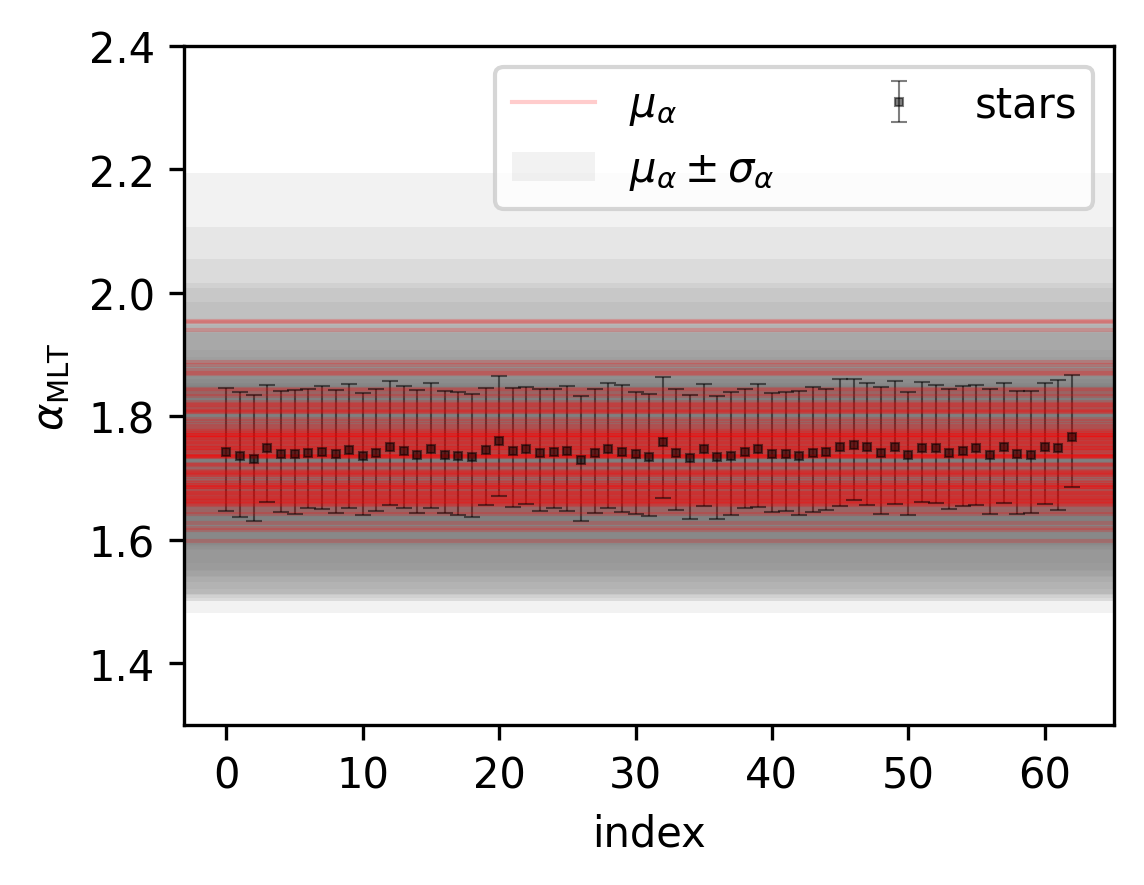

In [146]:
plt.figure(figsize=(4, 3), dpi=300)

for i in range(n):
    l_sig = plt.axhspan(mlt_upper[i], mlt_lower[i], facecolor='grey', edgecolor='none', alpha=0.1)

# plt.axhline()
for mmlt in mu_mlt:
    l0 = plt.axhline(mmlt, color='r', linewidth=1, alpha=0.2)

l1 = plt.errorbar(stars.index, stars['mlt_50th'], 
                 yerr=[stars['mlt_50th']-stars['mlt_16th'], stars['mlt_84th']-stars['mlt_50th']], 
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, label='stars', markeredgewidth=0.5,)

# l_mp = plt.axhline(2.09, color='b', linestyle='--')
# text = plt.text(0, 2.12, r'MPS $\alpha_\mathrm{mlt} = 2.09 \pm 0.03$', color='b')

handles = [l0, l_sig, l1]
labels = [r'$\mu_\alpha$', r'$\mu_\alpha \pm \sigma_\alpha$', 'stars']

if 'SUN' in stars['name'].to_numpy():
    s = stars[stars['name']=='SUN']
    l_sun, = plt.plot(s.index, s['mlt_50th'], c='gold', marker=r'$\odot$', markersize=8,
                 linestyle='none', markeredgewidth=0.2, zorder=3, label='sun', alpha=0.8
             )
    handles += [l_sun]
    labels += ['Sun']

plt.xlabel('index')
plt.ylabel(r'$\alpha_\mathrm{MLT}$')
plt.ylim(1.3, 2.4)
# plt.xticks(rotation=90, fontsize=4);
plt.legend(handles=handles, labels=labels, ncol=2, 
#            title='PPS',
#            loc='lower left'
          );
# plt.xlim(
#     sstars['mlt_50th'].median()-10*np.median(sigma_mlt),
#     sstars['mlt_50th'].median()+10*np.median(sigma_mlt)
# )
plt.savefig(os.path.join(path, 'mlt_results_plot.png'), bbox_inches='tight')

In [80]:
# # ax = stars.plot(kind='hist', y='mlt_50%', histtype='step', density=True)
# plt.figure(figsize=(4, 3), dpi=300)
# l0 = plt.plot(mlt, cdf, 'r', linewidth=1, alpha=0.2,  label='')
# l1 = plt.errorbar(sstars['mlt_50th'], sstars.index, 
#                  xerr=[sstars['mlt_50th']-sstars['mlt_16th'], sstars['mlt_84th']-sstars['mlt_50th']], 
#              linestyle='none', alpha=0.5, color='k',
#              marker='s', markersize=2, elinewidth=0.5,
#              capsize=2, label='stars', markeredgewidth=0.5,)

# plt.xlabel(r'$\alpha_\mathrm{MLT}$')
# plt.ylabel('star')
# plt.xlim(
#     sstars['mlt_50th'].median()-10*np.median(sigma_mlt),
#     sstars['mlt_50th'].median()+10*np.median(sigma_mlt)
# )
# plt.legend()
# plt.savefig(os.path.join(path, 'mlt_results_plot.png'), bbox_inches='tight')

In [81]:
pdf = norm.pdf(mlt[:, np.newaxis], mu_mlt, sigma_mlt)

(1.2460650354623795, 2.222519502043724)

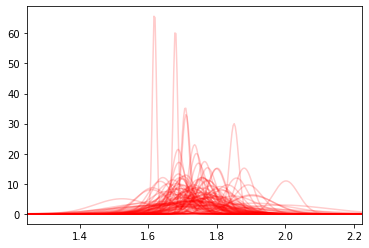

In [82]:
# plt.hist(sstars['mlt_50th'], density=True)
plt.plot(mlt, pdf, 'r', alpha=0.2);
plt.xlim(
    np.median(mu_mlt)-10*np.median(sigma_mlt),
    np.median(mu_mlt)+10*np.median(sigma_mlt)
)

In [83]:
yi_samples = posterior['population/stars/yi'].to_dataframe()
zi_samples = posterior['population/stars/zi'].to_dataframe()

In [84]:
xs = np.append(zi_samples.to_numpy(), yi_samples.to_numpy(), axis=1)
xs

array([[0.01186959, 0.25775802],
       [0.00575434, 0.25019366],
       [0.0086943 , 0.2527663 ],
       ...,
       [0.01356887, 0.24957278],
       [0.01275153, 0.2572497 ],
       [0.01460234, 0.25807077]], dtype=float32)

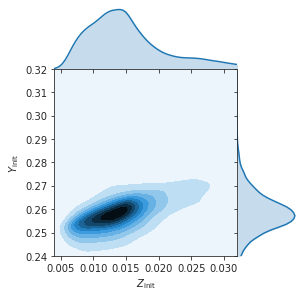

In [142]:
mask = np.random.choice(np.arange(xs.shape[0]), size=20000, replace=False)

with sns.axes_style('ticks'):
    gs = sns.jointplot(xs[mask, 0], xs[mask, 1], kind='kde',
                       height=4, ratio=3, space=0.0)
    ax = gs.ax_joint
    ax.set_xlim(0.004, 0.032)
    ax.set_ylim(0.24, 0.32)
    ax.set_xlabel(r'$Z_\mathrm{init}$')
    ax.set_ylabel(r'$Y_\mathrm{init}$')

plt.savefig(os.path.join(path, 'zi_yi_joint_plot.png'), dpi=300, bbox_inches='tight')

In [157]:
xs = samples.to_numpy()

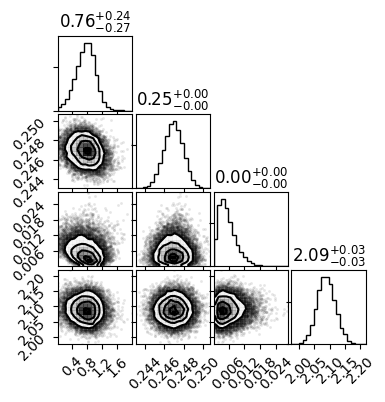

In [163]:
fig, axes = plt.subplots(len(params), len(params), figsize=(3.6, 3.6))
corner(xs, show_titles=True, fig=fig);